# Fourier Series

The Fourier series is a way to represent a periodic function as a sum of sines and cosines. The Fourier series is given by:

$$f(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos\left(\frac{2\pi n t}{T}\right) + b_n \sin\left(\frac{2\pi n t}{T}\right) \right)$$

where $T$ is the period of the function and $a_0$, $a_n$, and $b_n$ are the Fourier coefficients. The Fourier coefficients are given by:

$$a_0 = \frac{2}{T} \int_{0}^{T} f(t) dt$$

$$a_n = \frac{2}{T} \int_{0}^{T} f(t) \cos\left(\frac{2\pi n t}{T}\right) dt$$

$$b_n = \frac{2}{T} \int_{0}^{T} f(t) \sin\left(\frac{2\pi n t}{T}\right) dt$$

The Fourier series can be used to represent any periodic function, and the coefficients can be found using the integrals above.

# Example 1: Sine Wave

The Fourier series can be used to represent a sine wave, of frequency $f$. The equation of this sine wave is:

$$f(t) = \sin(2\pi f t)$$

With this in mind, we would expect to find that $a_0 = 0$, $a_n = 0$, and $b_n = 1$ for $n=1$, and zero for all $n>1$.

The period is $T = 1/f$, so the Fourier coefficients are:

$$a_0 = \frac{2}{T} \int_{0}^{T} \sin(\frac{2\pi t}{T}) dt = 0$$

$$a_n = \frac{2}{T} \int_{0}^{T} \sin(\frac{2\pi t}{T}) \cos\left(\frac{2\pi n t}{T}\right) dt = 0$$

$$b_n = \frac{2}{T} \int_{0}^{T} \sin(\frac{2\pi t}{T}) \sin\left(\frac{2\pi n t}{T}\right) dt = \delta_{n1}$$

## Example 2: Square Wave

The Fourier series can also be used to represent a square wave. The equation of this square wave is:

$$f(t) = \begin{cases} 1 & \text{if } 0 \leq t < T/2 \\ -1 & \text{if } T/2 \leq t < T \end{cases}$$

The period is $T$, so the Fourier coefficients are:

$$a_0 = \frac{2}{T} \int_{0}^{T} f(t) dt = 0$$

$$a_n = \frac{2}{T} \int_{0}^{T} f(t) \cos\left(\frac{2\pi n t}{T}\right) dt = 0$$

$$b_n = \frac{2}{T} \int_{0}^{T} f(t) \sin\left(\frac{2\pi n t}{T}\right) dt$$

$$ = \frac{2}{T} \int_{0}^{T/2} \sin\left(\frac{2\pi n t}{T}\right) dt - \frac{2}{T} \int_{T/2}^{T} \sin\left(\frac{2\pi n t}{T}\right) dt $$

$$= \frac{2}{T} \left( \frac{-T}{2\pi n} \cos\left(\frac{2\pi n t}{T}\right) \right) \Bigg|_{0}^{T/2} - \frac{2}{T} \left( \frac{-T}{2\pi n} \cos\left(\frac{2\pi n t}{T}\right) \right) \Bigg|_{T/2}^{T} = $$

$$= \frac{2}{T} \left( \frac{-T}{2\pi n} \cos\left(\pi n\right) + \frac{T}{2\pi n} \right)$$

$$=\frac{2}{T} \left( \frac{T}{2\pi n} \right) $$

$$=\frac{1}{n\pi} \text{ for } n \text{ odd}$$

Sd, the Fourier series for a square wave is:

$$f(t) = \sum_{n=1,3,5,...}^{\infty} \frac{1}{n\pi} \sin\left(\frac{2\pi n t}{T}\right)$$

$$ = \frac{1}{\pi} \sin(\frac{2\pi t}{T}) + \frac{1}{3\pi} \sin(\frac{6\pi t}{T}) + \frac{1}{5\pi} \sin(\frac{10\pi t}{T}) + ...$$

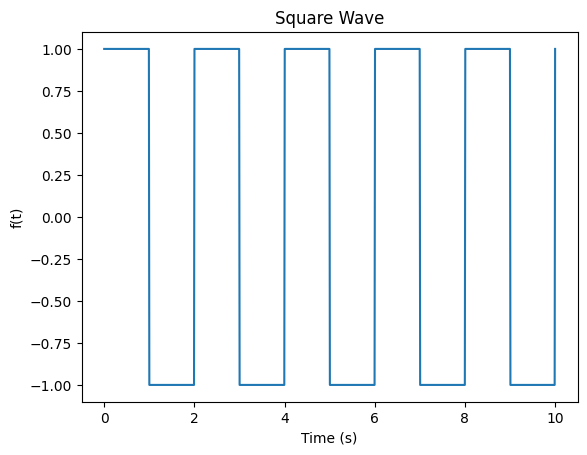

In [1]:
# Construct and plot the square wave

import numpy as np
import matplotlib.pyplot as plt

# Define the square wave function
def square_wave(t, T):
    if t % T < T/2:
        return 1
    else:
        return -1
    
# Create an array of time values
t = np.linspace(0, 10, 1000)

# Create an array of square wave values
f = np.array([square_wave(ti, 2) for ti in t])

# Plot the square wave
plt.plot(t, f)
plt.xlabel('Time (s)')
plt.ylabel('f(t)')
plt.title('Square Wave')
plt.show()

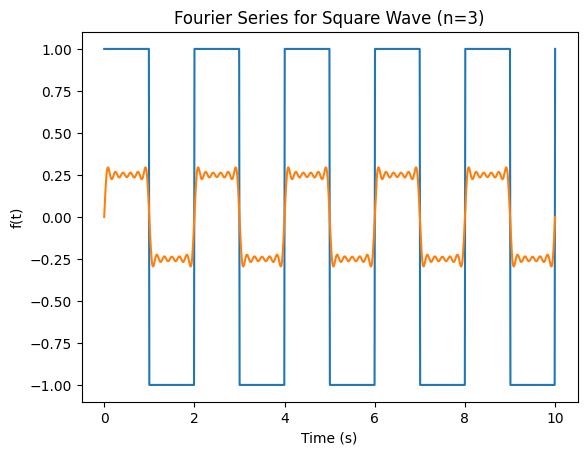

In [6]:
# Calculate the Fourier series for the square wave

# Define the Fourier series function
def fourier_series(t, T, n_max):
    f = 0
    for n in range(1, n_max+2, 2):
        f += 1/(n*np.pi) * np.sin(2*np.pi*n*t/T)
    return f

# choose period
T = 2

# Choose n
n_max = 11

# Create an array of Fourier series values
f_fourier_3 = np.array([fourier_series(ti, T, n_max) for ti in t])

# Plot the Fourier series and the square wave
plt.plot(t, f)
plt.plot(t, f_fourier_3)
plt.xlabel('Time (s)')
plt.ylabel('f(t)')
plt.title('Fourier Series for Square Wave (n=3)')
plt.show()